# NLP 2020 - HW1

## Part 1: Language Models

### 1.1 Data Exploration

### 1.1.1 Gathering and Cleaning Up Data

The function ptb_preprocess will assist us in cleaning up the data according to the given rules. First, let's introduce some functions that will help us edit the tokens list:

In [1]:
# Replace all numbers by the token N
def replaceNums(tokens):
    return ["N" if nltk.tokenize.punkt.PunktToken(w).is_number else w for w in tokens]

# Keep only the top-10K most frequent words in the dataset
def keep_only_top_freq(tokens, most_freq):
    return [w if (w in most_freq) or (w == "N") else "<unk>" for w in tokens]

def remove_punc_helper(w):
    punctuations = list(string.punctuation)
    return "".join([l for l in w if l not in punctuations])

# Remove all punctuations
def remove_punc(tokens):
    return [remove_punc_helper(w) for w in tokens if not remove_punc_helper(w) == ""]

# change to lowercase
def lower_case(tokens):
    return [w.lower() for w in tokens]

# Return an array of the top most frequent words in the dataset
def get_top_most_freq(tokens,top):
    fdistw = nltk.FreqDist(remove_punc(tokens))
    return [w for (w, n) in fdistw.most_common(top)]


ptb_preprocess will creata a two-dimensional array of tokenize words for every sentence, than it will use the functions defined above to edit the text and create the output files:

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import string
import nltk.data

def ptb_preprocess(filenames, top=10000):
    for fname in filenames:
        f = open(fname, "r")
        raw = f.read()

        # create an array of the top most freqent words in the text, will be using it later:
        most_freq = get_top_most_freq(word_tokenize(raw), top)

        tokens = [word_tokenize(t) for t in sent_tokenize(raw)]

        new_tokens = [(keep_only_top_freq(remove_punc(replaceNums(lower_case(s))), most_freq))
                      for s in tokens]


        new_tokens = [" ".join(t) for t in new_tokens]

        output = open(fname+ '.out', 'w+')

        [output.write(sent+"\n") for sent in new_tokens]
        output.close()

Let's test the function on some examples:

In [3]:
f = open('a.txt', 'w+')
f.write("Green green green blue blue red orange 100")

f.close()

filenames = ["a.txt"]
ptb_preprocess(filenames,2)

f = open("a.txt.out", "r")
print(f.read())

green green green blue blue <unk> <unk> N



As expected the output is in lowercase, only the 2-most-frequent words 'blue' and 'green' remained, and the number "100" was replaced by the token 'N'. Let's look at another example where we can observe how words like "don't" and "$12" are splits into two words:

In [4]:
f = open('b.txt', 'w+')
f.write("don't caller's $12")
f.close()

filenames = ["b.txt"]
ptb_preprocess(filenames)

f = open("b.txt.out", "r")
print(f.read())

do nt caller s N



Finally, let's run the function on 'Shakespeare works' and print the first 5 lines:

In [5]:
import urllib

url = "https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt"
urllib.request.urlretrieve(url, "shakespeare_input.txt")

filenames = ["shakespeare_input.txt"]
ptb_preprocess(filenames)

with open("shakespeare_input.txt.out") as myfile:
    [print(next(myfile)) for x in range(10)]


first citizen before we proceed any further hear me speak

all speak speak

first citizen you are all resolved rather to die than to famish

all resolved

resolved

first citizen first you know <unk> <unk> is chief enemy to the people

all we knowt we knowt

first citizen let us kill him and we ll have corn at our own price

ist a verdict

all no more talking o nt let it be done away away



The definition of what is a "word" thats adopted is Semantic. The tokens are split into independent units of meaning as we can obseve from the example word 'don't' which is seperted into 'do' and 'nt'. 
If we use a character level language model the definition of a word changes into an orthographic definition.

### 1.1.2 Gathering Basic Statistics

In [6]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
import math

def count_tokens(dataset):
    return len(word_tokenize(dataset))

def count_characters(dataset):
    return len(dataset)

def count_distinct_words(dataset):
    return len(set((word_tokenize(dataset))))

def count_most_N_frequent(dataset):
    
    most_frequent = (word for word in dataset.split() if not word == "<unk>")
    return len(set(most_frequent))

def token_type_ratio(dataset):
    return count_tokens(dataset) / count_distinct_words(dataset)

def dev_vs_train(dev_dataset, train_dataset):
    set1 = set(dev_dataset)
    set2 = set(train_dataset)

    return len(set1.difference(set2))

def avg_and_standart_deviation(dataset, characters_dataset):
    mean = count_tokens(characters_dataset) / count_tokens(dataset)

    sum = 0
    for token in dataset.split():
        sum += pow((len(token) - mean), 2)
    standart_deviation = math.sqrt((sum / count_tokens(dataset)))

    return (mean, standart_deviation)

def diff_ngrams(dataset, n):

    n_grams = list(ngrams(word_tokenize(dataset), n))
    return len(n_grams)

Now we will discuss our expectations in comparison to the results. We will eaxmine the statistics of the ptb train dataset.

Our expectaion for number of tokens is around 800,000. The dataset is 400,000 lines long and contains about 20 words in each line.

Our expectaion for number of characters is around: the number of tokens * 5 = 800,000 * 5 = 4,000,000 since we expect the words to be not too short and not too long.

Our expectaion for number of distinct words is around 5000. The document is in English which contains 171,476 words (according to the English dictionary). Apparently, not all English words appear in the text, but a 5 percent is a likely estimate.

Our expectaion for number of tokens corresponding to the top-N most frequent words in the vocabulary is 10000 because we calculate the top 10000 frequent words.

Our expectaion for number of token/type is around 200 becuase we believe that there are a lot of words that repeat theirselves.

Our expectaion for number of types that appear in the dev data but not the training data is around 100 since the dev data is much shorter than the training data.

Our expectaion for average number and standard deviation of characters per token is around 5 characters per token with standart deviation of 1.

Our expectation for the total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4 is around 800,000 - n + 1 for each n. Because in a text of |T| words this is the number of possible n-grams.

Our expectation for the total number of distinct n-grams (of characters) that appear in the dataset for n=2,3,4,5,6,7 is around 800,000 * 5 - n + 1 for each n.


In [7]:
text = open("simple-examples/data/ptb.train.txt").read()
characters_dataset = open("simple-examples/data/ptb.char.train.txt").read()
dev_dataset = open("simple-examples/data/ptb.valid.txt").read()


tokens = count_tokens(text)
print("The total number of tokens is:", tokens)
characters = count_characters(text)
print("The total number of characters is:", characters)
vocab = count_distinct_words(text)
print("The total number of distinct words is:", vocab)
topn = count_most_N_frequent(text)
print("The total number of tokens corresponding to the top-N most frequent words in the vocabulary is:", topn)
ratio = token_type_ratio(text)
print("The token/type ratio in the dataset is:", ratio)
dev_not_train = dev_vs_train(dev_dataset, text)
print("The number of types that appear in the dev data but not the training data is:", dev_not_train)
(avg, deviation) = avg_and_standart_deviation(text, characters_dataset)
print("The average number and standard deviation of characters per token are: ", "avg:", avg, "deviation:", deviation)


for i in range(2, 5):
    n_grams = diff_ngrams(text, i)
    print("The total number of distinct n-grams (of words) that appear in the dataset for n =",i, n_grams)

for i in range(2, 8):
    n_grams = diff_ngrams(characters_dataset, i)
    print("The total number of distint n-grams of characters that appear for n =",i, n_grams)

The total number of tokens is: 978726
The total number of characters is: 5101618
The total number of distinct words is: 9996
The total number of tokens corresponding to the top-N most frequent words in the vocabulary is: 9998
The token/type ratio in the dataset is: 97.91176470588235
The number of types that appear in the dev data but not the training data is: 0
The average number and standard deviation of characters per token are:  avg: 5.08356169142334 deviation: 2.5113567920948805
The total number of distinct n-grams (of words) that appear in the dataset for n = 2 978725
The total number of distinct n-grams (of words) that appear in the dataset for n = 3 978724
The total number of distinct n-grams (of words) that appear in the dataset for n = 4 978723
The total number of distint n-grams of characters that appear for n = 2 4975413
The total number of distint n-grams of characters that appear for n = 3 4975412
The total number of distint n-grams of characters that appear for n = 4 4975

The number of tokens is 978726, which is pretty close to our estimation and thus is not very surprising.

The number of characters is 5,101,618 which is longer in 100,000 than our estimation, meaning the text contained longer words than we expected.

The number of distinct words is 9996 which is twice than what we expected and thus a little bit surprising.

The number of tokens corresponding to the top-N most frequent words is 9998 which is very close to the number we assumed.

The number of token/type is 97.91176470588235 which is about half than what we thought.

The number of types that appear in the dev data but not the training data is 0 which is not much less than we thought.

The average number and standard deviation of characters per token is (avg: 5.08356169142334 deviation: 2.5113567920948805) which is pretty close to out estimation.

The total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4 are indeed 978725, 978724, 978723

As we can see the numbers of distinct n-grams (of characters) that appear in the dataset for n=2,3,4,5,6,7 are indeed 4975413, 4975412, 4975411, 4975410, 4975409, 4975408.

Now one last thing is to check whether the Penn Treebank dataset follows the power law distribution. We will check this with the following code:

In [8]:
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter

text = open("simple-examples/data/ptb.train.txt").read()

plt.loglog([val for word,val in Counter(text).most_common(4000)])
plt.xlabel('rank')
plt.ylabel('frequency')

plt.show()

<Figure size 640x480 with 1 Axes>

We can see that a relative change in frequency results in the proportional relative change in the rank, hence it follows the power low distribution.  

### 1.2 n-gram Word Language Model

In [9]:
from collections import *
from collections import Counter
import nltk
from nltk import word_tokenize, ConditionalFreqDist, ConditionalProbDist
import matplotlib.pyplot as plt
import numpy as np


def train_word_lm(data, n=2):
    lm = defaultdict(Counter)
    pad = "~ " * (n-1)
    data = pad + data
    data = data.split()

    for i in range(len(data)-n+1):
        history, word = data[i:i+n-1], data[i+n-1]
        history = " ".join(history)
        lm[history][word]+=1
    def normalize(counter):
        s = float(sum(counter.values()))
        return [(c,cnt/s) for c,cnt in counter.items()]
    outlm = {hist:normalize(words) for hist, words in lm.items()}
    return outlm

The data structure used in the model is a dictionary where the keys are all the sequences of n words from the text and the values are counter objects used for the amount of times every word appeared after every sequence. The dictionary is of size at most the number of N-grams multiplied by the size of the vocabulary - so we get:
O((|tokens| - n)* |vocabulary|)


Let's test the function on a simple example:

In [10]:
data = "the book is green the book is blue the book is green"

lm = train_word_lm(data)
print(lm["the"])

lm = train_word_lm(data, n=3)
print(lm["book is"])

[('book', 1.0)]
[('green', 0.6666666666666666), ('blue', 0.3333333333333333)]


In [11]:

class LangModelI:
    lm = ""
    probDist = ""

    def __init__(self,text, n=2):
        self.lm = train_word_lm(text, n)

    def get_most_likely_word(self, seq):
        return max(dict(self.lm[seq]), key=dict(self.lm[seq]).get)

    def get_prob(self,seq, word,):
        p = dict(self.lm[seq]).get(word)
        if p is None:
            return 0;
        return p
 


data = "the book is green the book is blue the book is green"

m1 = LangModelI(data)
m2 = LangModelI(data,3)

#using the model to get the probability of a word given an history sequence
print("The probability for \"is\" to appear after \"book\" is: ")
print(m1.get_prob("book", "is"), "\n")


#using the model to get the probability of a word given an history sequance
print("The probability for \"green\" to appear after \"book is\" is: ")
print(m2.get_prob("book is", "green"))


The probability for "is" to appear after "book" is: 
1.0 

The probability for "green" to appear after "book is" is: 
0.6666666666666666


### 1.3.1 Perplexity

we'll update the class to include functions that will help us compute the preplexity:

In [12]:
class LangModelI:
    lm = ''
    prob_dist = ''
    n = ''
    estimator = ''
    fileName = ''
    text = ''

    def __init__(self, fileName, n=2, estimator=None):
        self.fileName = fileName
        self.n = n
        self.init_text()
        self.lm = train_word_lm(self.text, n)
        self.estimator = estimator
        if self.estimator is not None:
            self.init_prob_factory()


    def init_text(self):
        f = open(self.fileName, "r")
        self.text = f.read()

    def get_most_likely_word(self, seq):
        return max(dict(self.lm[seq]), key=dict(self.lm[seq]).get)

    def get_prob(self, seq, word):
        if self.estimator is None:
            p = dict(self.lm[" ".join(seq)]).get(word)
        else:
            p = self.prob_dist[seq].prob(word)
        if p is None:
            return 0;
        return p

    def get_logprob(self, seq, word):
        if self.estimator is not None:
            return - self.prob_dist[seq].logprob(word)
        else:
            p = dict(self.lm[seq]).get(word)
            if p is None:
                return 0
            return p


    def init_prob_factory(self):
        split_text = (self.text).split()
        cfd = nltk.ConditionalFreqDist(
            (" ".join(split_text[i: i + self.n - 1]), "".join(split_text[i + self.n - 1]))
            for i in range(len(split_text) - self.n + 1))

        self.prob_dist = nltk.ConditionalProbDist(cfd, self.estimator)

get_word_and_context_pairs returns the ngrams organized as pairs of (context, word).

'perplexity' function compute the perplexity of the model by using the function 'get_entropy' and computing 2 ^ entorpy:


In [13]:
def get_word_and_context_pairs(text,n):
    pairs = []
    for i in range(n - 1, len(text)):
        context, word = tuple(text[i - n + 1:i]), text[i]
        context = " ".join(context)
        pairs.append((context,word))
    return pairs

def get_entropy(lm, text, n=2):
    sum = 0
    pairs = get_word_and_context_pairs(text,n)
    for (context, word) in pairs:
        sum += lm.get_logprob(context, word)
    return sum / (len(text) - n + 1)

def perplexity(lm, text, n=2):
    return 2 ** get_entropy(lm,text, n)

Now we can use it to get the perplexity values of the Penn Treebank dataset:

In [14]:
lidstone_estimator = lambda fd: nltk.LidstoneProbDist(fd, 0.01, fd.B() + 100)
lm = LangModelI('simple-examples/data/ptb.valid.txt', 2, lidstone_estimator)

f = open("simple-examples/data/ptb.test.txt", "r")
test_text = f.read()
test_text = test_text .split()

print(perplexity(lm, test_text))

287.21096735500424


In order to change the model to use a different estimators the class includes a function named init_prob_factory which creates the ConditionalProbDist object.

now we can use it to get the perplexity of the trained model on the validation dataset for a variety of hyper-parameter gamna.
The lower the perplexity the better the model so we'll try to find the best gamma by finding the one that give us the lowest perplexity:


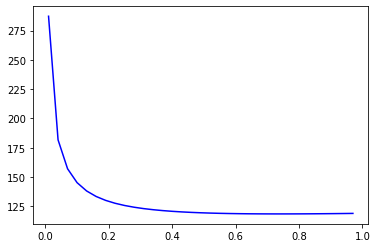

The best gamma is:  0.73


In [15]:
f = open('simple-examples/data/ptb.test.txt', "r")
test_text = f.read()
test_text = test_text .split()

gammas = np.array([])
p_vals = np.array([])

opt_gamma = 1
min_p = 1000

for i in np.arange(0.01, 0.99, 0.03):
    gammas = np.append(gammas, i)
    lidstone_estimator = lambda fd: nltk.LidstoneProbDist(fd, i, fd.B() + 100)
    lm = LangModelI('simple-examples/data/ptb.valid.txt', 2, lidstone_estimator)
    p_i = perplexity(lm, test_text)
    p_vals = np.append(p_vals,p_i)
    if p_i < min_p:
        opt_gamma = i
        min_p = p_i

plt.plot(gammas, p_vals,'b')
plt.show()

print("The best gamma is: ", opt_gamma)

now we would like to improve the model by using an n-gram model with increasing values of n:

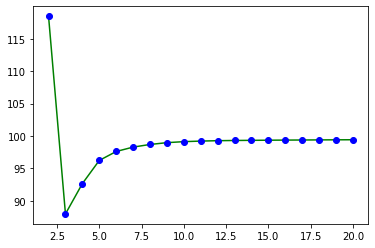

The best n is: 3


In [16]:
f = open('simple-examples/data/ptb.test.txt', "r")
test_text = f.read()
test_text = test_text .split()

opt_n = 0;
min_p = 1000
n_vals = np.array([])
p_vals = np.array([])

for i in range(2, 21):
    n_vals = np.append(n_vals, i)
    lidstone_estimator = lambda fd: nltk.LidstoneProbDist(fd, opt_gamma, fd.B() + 100)
    lm = LangModelI('simple-examples/data/ptb.valid.txt', i, lidstone_estimator)
    p_i = perplexity(lm, test_text, i)
    p_vals= np.append(p_vals,p_i)
    if p_i < min_p:
        opt_n = i
        min_p = p_i


plt.plot(n_vals, p_vals,'g')
plt.plot(n_vals, p_vals, 'bo')
plt.show()

print("The best n is:", opt_n)


Let's prepare the best predicted n-gram model based on a Lidstone model with the optimized gamma parameter and of the best possible n order:

In [17]:
lidstone_estimator = lambda fd: nltk.LidstoneProbDist(fd, opt_gamma, fd.B() + 100)
lm = LangModelI('simple-examples/data/ptb.valid.txt', opt_n, lidstone_estimator)

print(perplexity(lm, test_text, opt_n))


87.9751006368645


The best preplixty we could find online is 46.6 which is better than the one we got-  87.9751.



### 1.3.2 Generating Text from a Language Model

In [18]:
from random import random

def create_word(model, history):
    r = random()
    for word, prob in model[history]:
        r = r - prob
        if r <= 0 :
            return word


def generate(model, seed):
    history = " ".join(seed)
    out = []
    for i in range(0, 100):
        c = create_word(model, history)
        history += " " + c
        history = history.split()
        history = history[1:]
        history = " ".join(history)
        out.append(c)
    return " ".join(out)

Let's test it on our model, for n=3:

In [19]:
f = open("simple-examples/data/ptb.valid.txt", "r")
text = f.read()

lm = train_word_lm(text, 4)
print(generate(lm, ["ban", "on", "ivory"]))

trade despite objections from southern african governments which threatened to find alternative channels for selling elephant <unk> the move by the convention on trade in endangered <unk> meeting in switzerland places the elephant on the <unk> election campaign he interviewed mr. <unk> head of stock-index futures last week traders said brokerage firms as a rule do n't comment on their market activity unlike the week following black monday two years ago individual traders in the s&p N futures pit to await the opening bell traders were shouting bids and offers that were a full point apart said one s&p N


Generating when the seed is shorter that the history length of the n-gram model maybe can be done by adding a random word from the vocabulary to the seed, or basing the implementation regardless of the history. We might want that the genration will stop when the text is shorter than the original text, so if our model is good it will generate a readable text but if it is not, we will stop in time to see what we can fix.
Now let's generate segments on 5 different seeds:

In [20]:
print(generate(lm, ["especially", "hard", "at"]))
print()
print(generate(lm, ["statement", "of", "the"]))
print()
print(generate(lm, ["specially", "made", "for"]))
print()
print(generate(lm, ["N", "east", "germans"]))
print()
print(generate(lm, ["mr.", "fromstein", "said"]))

the task it is <unk> listening for the now generation mr. glass has constructed his solo program around a move from the simple to the relatively complex opening N from <unk> <unk> the <unk> the report by the defense ministry also rejected allegations that britain covered up evidence of <unk> 's activities as a german army officer an international group approved a formal ban on ivory trade despite objections from southern african governments which threatened to find alternative channels for selling elephant <unk> the move by the convention on trade in endangered <unk> meeting in switzerland places the elephant on

national taxpayers union it <unk> in the world series tomorrow replacing the debut commercial of shearson 's <unk> black-and-white where we stand commercials which have been running occasionally in response to news events since N the ad would have run during the world series last weekend the team that dumped runs by the bushel on the chicago board of trade futures contract of 

We observe that as we change the seeds we see different results that are based on the words created from the given history as a seed. For example, in seed like the first there is a discussion about certain task, which makes sense in relation to something that is "especially hard at".
The last text talks about a person "he" which is reasonable given the seed "mr. Fromstein said" which "mr. Fromstein" is a proper name.

A temperature argument can control the level of variability generated by the model by that it increases the probability of each word and thus changes it, so the word is not necessarily the most likely one to be chosen and some words that are less common in a given context can be chosen over the others.
The code in the method generator.py from Sameer Sing corresponds to the mathematical explanation provided in the blog by that it calculates the probability of the word, then divides it by the temperature, then calculates the sum of log2 of (2 ^ the quotient + 2 ^ the previous quotient), then for each result again calculates the sum of log2 of (2 ^ each result + 2 ^ the previous result), then raises 2 by the power of the differences between the two sums and if it greater then the random number then the word is being chosen. So the temperature increases each probability and then affects the next word that will be chosen.

### 1.4 Character language model

The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy Summary:

In the article we can observe that RNN language models are able to generate different texts using an input related to a certain field. For example, receiving different inputs of code samples, it can create code blocks that probably won’t compile, but will be perfectly indented and will have balanced brackets, meaning it supplies a very good frame to a code and in addition a code that is very close to a code that works. The thing that is most surprising in the experimental results reported in the blog is that while the common belief at the time the results were published was that RNNs were difficult to train, it is in fact pretty easy and powerful. We witness that by the results of the experiments shown in the article, such as the code block we discussed earlier, a Wikipedia text that the model generated pretty close to the origin, Shakespeare monologues that even though we can see it’s not a Shakespeare’s real text, the model still created pretty good monologues in an eloquent English. Another interesting result is of creating a Latex sampled algebraic geometry. It teaches us that the model is quite good at learning complicated syntactic structures. In conclusion, RNNs are good models to use for training.

The unreasonable effectiveness of Characters-level Language Model By Yoav Goldberg Summary:

This article discusses the power of language models that do not use smoothing (unlike RNNs models that do use smoothing). The main claim of the writer is that unsmoothed maximum likelihood characters level language models have effectiveness on generating convincing natural language outputs. The unsmoothed maximum likelihood characters level language model works as follows. It calculates the probability of each character to appear next to a history of n characters according to the total number of times the history characters appear in the text in the same order. The article presents a few examples to how the using of that kind of model generates different English texts like a text based on Shakespeare’s sample. It shows that as greater the n as better the text the model generates. The writer is mostly impressive by the context awareness of the model. He says that the model succeeded in learning the context by the history given, for example learned well how to create nested brackets and indented blocks within a code. Finally, the writer tries the model on Linux-kernel code. On these results, he is not very satisfied by the results of the maximum likelihood characters level language models and thus concludes that LSTM, one of RNNs that uses smoothed language models, is doing its job well on texts like this, and thus summarizes that he is impressed by RNNs after all.



Now we will gather the recipes dataset and prepare a dataset reader according to the structure of the files:

In [21]:
ptb_preprocess(["neural_net_cooking_recipes.txt"])

The basic statistics about the dataset:

The number of recipes in the dataset is:  62
The number of tokens in the dataset is:  14857
The number of characters in the dataset is:  67256
The size of the vocabulary of the dataset is:  1102
The distribution of the size of recipes in words in the dataset is:


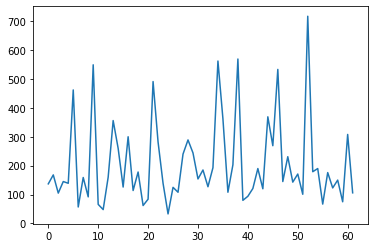

The distribution of the size of recipes in chars in the dataset is: 


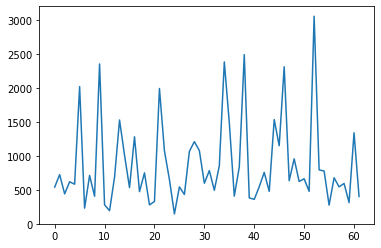

The distribution of length of words in the dataset is:


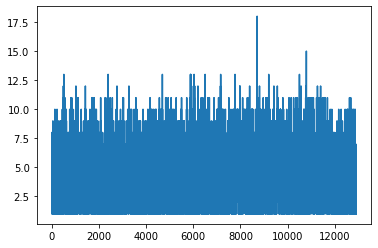

In [22]:
from matplotlib import pyplot

dataset = open("neural_net_cooking_recipes.txt.out").read()
tokenized = dataset.split()

recipes = 0
for i in range(0, (len(tokenized) - 1)):
    if tokenized[i] == "recipe" and tokenized[i + 1] == "via":
        recipes += 1
print("The number of recipes in the dataset is: ", recipes)

tokens = count_tokens(dataset)
print("The number of tokens in the dataset is: ", tokens)

characters = count_characters(dataset)
print("The number of characters in the dataset is: ", characters)

vocab = count_distinct_words(dataset)
print("The size of the vocabulary of the dataset is: ", vocab)

def count_dist(word_or_char):
    recipes_sizes = []
    curr_size = 0
    for i in range(0, len(tokenized)):

        if tokenized[i] != "v805":
            if word_or_char == "word":
                curr_size += 1
            elif word_or_char == "char":
                curr_size += len(tokenized[i])
            continue
        else:
            recipes_sizes.append(curr_size)
            curr_size = 0
    recipes_sizes.append(curr_size)

    recipes_sizes = recipes_sizes[1:len(recipes_sizes)]
    return recipes_sizes
    
recipes_sizes = count_dist("word")
pyplot.plot(recipes_sizes)
print("The distribution of the size of recipes in words in the dataset is:")
pyplot.show()

dist_recipes_chars = count_dist("char")
pyplot.plot(dist_recipes_chars)
print("The distribution of the size of recipes in chars in the dataset is: ")
pyplot.show()

dist_len_words = []
for word in tokenized:
    dist_len_words.append(len(word))

pyplot.plot(dist_len_words)
print("The distribution of length of words in the dataset is:")
pyplot.show()

Now we will split the dataset into training, dev and test as a 80%/10%/10% split.

For the order of the char n-gram according to the indications given in Yoav Goldberg's article we will choose n = 3. In Yoav Goldberg's article we've seen that n = 10 worked pretty well on a very long text. 
Here we have a much shorter text, hence we expect for good results for a smaller n.
We will train a char language model using Yoav Goldberg's code:

In [27]:
train_file = open("recipes.train.txt", "w+")
dev_file = open("recipes.dev.txt", "w+")
test_file = open("recipes.test.txt", "w+")

lines = dataset.splitlines()
eighty = int(0.8 * len(lines))
ten = int(0.1 * len(lines))
training_words = []


for i in range(0, eighty):
    training_words.append(lines[i])
training_words = "\n".join(training_words)
train_file.write(training_words)

dev_words = []
for i in range(eighty, eighty + ten):
    dev_words.append(lines[i])
dev_words = "\n".join(dev_words)
dev_file.write(dev_words)


test_words = []
for i in range(eighty + ten, len(lines)):
    test_words.append(lines[i])
test_words = "\n".join(test_words)
test_file.write(test_words)

7833

In [28]:
# --------taken from Yoav Goldberg's assay The unreasonable effectiveness of Character-level Language Models (It stated in the assignment that we may use it!) --------

from collections import *

def train_char_lm(fname, order=4):
    data = open(fname, "r").read()
    lm = defaultdict(Counter)
    pad = "~" * order
    data = pad + data
    for i in range(len(data)-order):
        history, char = data[i:i+order], data[i+order]
        lm[history][char]+=1
    def normalize(counter):
        s = float(sum(counter.values()))
        return [(c,cnt/s) for c,cnt in counter.items()]
    outlm = {hist:normalize(chars) for hist, chars in lm.items()}
    return outlm

from random import random

def generate_letter(lm, history, order):
        history = history[-order:]
        dist = lm[history]
        x = random()
        for c,v in dist:
            x = x - v
            if x <= 0: return c

def generate_text(lm, order, nletters=1000):
    history = "~" * order
    out = []
    for i in range(nletters):
        c = generate_letter(lm, history, order)
        history = history[-order:] + c
        out.append(c)
    return "".join(out)

# --------end of taken from Yoav Goldberg's assay The unreasonable effectiveness of Character-level Language Models--------

lm = train_char_lm("recipes.dev.txt", 3)

We will calculate the perplexity:

In [29]:
from nltk.lm import MLE
from nltk.lm.preprocessing import pad_both_ends, padded_everygram_pipeline


lm3 = train_char_lm("recipes.dev.txt", 3)

my_text = generate_text(lm3, 3)
validation_sentences = [my_text]
tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) 
                    for sent in validation_sentences]


n = 3
model = MLE(3)
validation_data, padded_vocab = padded_everygram_pipeline(n, tokenized_text)
model.fit(validation_data, padded_vocab)

validation_data, _ = padded_everygram_pipeline(n, tokenized_text)



for i, valid in enumerate(validation_data):
    print("The perplexity is:", model.perplexity(valid))

The perplexity is: 5.653399132522446


Let's sample about 5 generated recipes from the trained language model:

In [30]:
for i in range(1,5):
    my_text = generate_text(lm3, 3)

    print("sample", i, ":")
    print()
    print(my_text)

sample 1 :

cooking cabbage slic ming to degreezer seeds slic sugarly cool N ts potatoes an oil bowl mix weightly fine for another medients
serving pot pepper
stir until inver sheese and peacheese and onion a proces serving whisk until and sugar a shred 12 c let aside
chocolate mix weigh salt aside
boil the pot
add then <unk> the ring cuminutes
<unk>
the sharp into ble N gar a <unk> the dough
used sugar in set aside
rol and add the flour and sugar add taste gelatiny fine and thyme alosed pot over mediumhigh for and add the oil about N gar into a closheese N c vernigh heat for cinnaise 14 c mediumsized pepper
baking ing caloriand add olive off and by stic chocolate gar N tb oil the celery <unk> tm v805 <unk> cand all of and add the pepped pot overnighrigerate bowl
fill the eggs N ts pepper over and peacheese and salt aside
<unk> N c let in the onion juiced combine and peach the salt in a few preheat N deep fryger and pared like oil the powder the flour beans options togethe fatfresh par

Our observations:

1) We can see that the model uses commands like "cool", "stir" and "boil" in the beginning of the sentences, as it should.

2) We also see that the model uses conjunctions like "to", "and", "or", etc. in the right place (For example, "store olive of cooks").

3) Sometimes the model repeats words, for example "the the".

4) The model learned some foods names and used them in its recipes (like "oil", "pepper", etc.).

5) The model still created some odd words like "servingree", i.e it merged two words that it wasn't supposed to merge.


## Part 2: Polynomial Curve Fitting

### 2.1 Synthetic Dataset Generation

In [ ]:
def generateDataset(N, f, sigma):
    mu = 0.0

    x = np.linspace(0,1,N)

    t = np.array([])
    for i in range(0, N):
        t = np.append(t, f(x[i]) + rn.normal(mu, sigma))

    return (x, t)

now we'll draw a plot of (x,t) using matplotlib for N=100 and the function sin(2πx):

In [ ]:
import math
import numpy as np
from numpy import random as rn
import matplotlib.pyplot as plt


def y(x):
    return math.sin(2 * math.pi * x)

(x, t) = generateDataset(100, y, 0.03)
plt.plot(x, t)
plt.show()

### 2.2 Polynomial Curve Fitting

Given (x,t) we will attempt to estimate a vector w of size M that will minimize the square error function. 

let's add a function to compute the design matrix according to the defntion:
matrix Φ such that Φnm = xn^m = Φm(xn).

we'll than use the design matrix to compute WLS by the rule:
WLS = (Φ^TΦ)-1ΦTt

In [ ]:
def get_design_matrix(x,M):
    design_matrix = np.ones(x.size)
    for i in range(1,M+1):
        column_i = [(curr_x**i) for curr_x in x]
        design_matrix = np.column_stack([design_matrix,column_i])

    return design_matrix


def OptimizeLS(x, t, M):
    phi = get_design_matrix(x,M)
    prod = np.dot(phi.T, phi)
    i = np.linalg.inv(prod)
    m = np.dot(i, phi.T)
    w = np.dot(m, t)

    return w

let's add a simple function that will help us later,

poly get x and a list of coefficients and return the value of the polynomial defined by the coefficients for x:

In [ ]:
def poly(coeff,x):
    fx = 0
    for i in range(0,coeff.size):
        fx = fx +coeff[i]*(x**i)
    return fx


now we can demonstrate the result for different parameters.
we'll use the function sin(2πx), dataset of size N=10 and M=1:

In [ ]:
# get the real function curve
x_real = np.arange(0, 1, 0.01)
t_real = [y(x) for x in x_real]
plt.plot(x_real, t_real,'g')

(x, t) = generateDataset(10, y, 0.03)
plt.plot(x, t,'ro')

w = OptimizeLS(x, t, 1)
t_new = [poly(w,xi) for xi in x]

plt.plot(x, t_new,'b')
plt.show()

In [ ]:
plt.plot(x_real, t_real,'g')

(x, t) = generateDataset(10, y, 0.03)
plt.plot(x, t,'ro')

w = OptimizeLS(x, t, 3)
t_new = [poly(w,xi) for xi in x]

plt.plot(x, t_new,'b')
plt.show()

In [ ]:
# M = 5
plt.plot(x_real, t_real,'g')

(x, t) = generateDataset(10, y, 0.03)
plt.plot(x, t,'ro')

w = OptimizeLS(x, t,5)
t_new = [poly(w,xi) for xi in x]

plt.plot(x, t_new,'b')
plt.show()

In [ ]:
#M = 10
plt.plot(x_real, t_real,'g')

(x, t) = generateDataset(10, y, 0.03)
plt.plot(x, t,'ro')

w = OptimizeLS(x, t, 10)
t_new = [poly(w,xi) for xi in x]

plt.plot(x, t_new,'b')
plt.show()

It appears that the method got the best result for M = 5. For greater values it fitts some of the data points but the fitted curve oscillates outside of them and gives a poor representation of the function sin(2πx).  This behaviour is known as over-fitting.

### 2.3 Polynomial Curve Fitting with Regularization

To avoid over-fitting, we will use a method called regularization.

optimizePLS returns the optimal parameters W_PLS given M and a hyper-parameter lambda. 
generateDataset3(N, f, sigma) create 3N equi-distant values and divides them to 3 randomly shuffled sets of size N-
train, validate and test.

In [ ]:
def optimizePLS(x, t, M, lambdaVar):
    # wPLS = (ΦTΦ + λI)-1ΦTt
    phi = get_design_matrix(x, M)
    lambda_id = lambdaVar*np.identity(M+1)
    prod = np.dot(phi.T, phi) + lambda_id
    i = np.linalg.inv(prod)
    m = np.dot(i, phi.T)
    w = np.dot(m, t)

    return w

def generateDataset3(N, f, sigma):
    mu = 0.0
    x = np.linspace(0, 1, 3*N)

    #divide the set into 3 subsets of size N
    x_train = x[:(N)]
    x_valid = x[N:N * 2]
    x_test = x[N * 2:N * 3]

    #shuffle the sets
    np.random.shuffle(x_train)
    np.random.shuffle(x_valid)
    np.random.shuffle(x_test)

    #compute the t's sets
    t_train =  np.array([])
    t_valid =  np.array([])
    t_test = np.array([])
    for i in range(0, N):
        t_train = np.append(t_train, f(x_train[i]) + rn.normal(mu, sigma))
        t_valid = np.append(t_valid, f(x_valid[i]) + rn.normal(mu, sigma))
        t_test = np.append(t_test, f(x_test[i]) + rn.normal(mu, sigma))

    return (x_train,t_train),(x_valid,t_valid),(x_test,t_test)

normalized_error will compute the normalized error for a given W = W0..Wm:

In [ ]:
def normalized_error(x,t,w,N):
    err = 0
    for i in range(N):
        poly_i = 0
        for m in range(w.size):
            poly_i = poly_i + w[m]*(x[i]**m)
        err = err + (t[i] - poly_i)**2
    err = err**0.5
    err = err*(1/N)
    return err


optimizePLS2 will use the training set to compute the W's and use the validate set to choose the optimal lambda.
it will also return an 'error vector' which holds the error for every lamdba.

The optimal lambda will be selected from the interval (2^-40, 2^-20) and will be the one the has the smallest normalized error.

In [ ]:
def optimizePLS2(xt, tt, xv, tv, M):
    lambda_vals = np.array([])
    lambda_err = np.array([])
    min_err = 1000  #initialized to a max value 
    opt_lambda = 0
    
    for i in range(-40,-19):
        
        #add the new lambda value to needs to be checked
        curr_lambda = 2**i
        lambda_vals = np.append(lambda_vals, curr_lambda)
        
        #find W0...Wm by using the training set:
        w =optimizePLS(xt,tt,M,curr_lambda) 
        
        #now we want to save the error for this lambda using the vaildate set
        err = normalized_error(xv, tv, w, xv.size)
        lambda_err= np.append(lambda_err, err)
        
        # save it if it's the current minimal error
        if(err < min_err):
            min_err = err
            opt_lambda = curr_lambda

    return (lambda_vals,lambda_err,opt_lambda,min_err)

now we can create the 3 sets for N=10 and use it:

In [ ]:
(x_train,t_train),(x_valid,t_valid),(x_test,t_test) = generateDataset3(10, y, 0.03)

(lambda_vals,lambda_err,opt_lambda, min_err) = optimizePLS2(x_train, t_train, x_valid, t_valid, 5)



#sort the array so that plot will print it nicely...
x_test, t_test = zip(*sorted(zip(x_test, t_test)))
x_test = np.asarray(x_test)
t_test = np.asarray(t_test)



First, let's draw the plot of the normalized error of the model for N=10:

In [ ]:
plt.plot(lambda_vals,lambda_err,'r')
plt.plot(opt_lambda, min_err, 'g*')
plt.show()

print("the optimal lambda is: ", opt_lambda)
print("it's normalized_error is: ", min_err)

we can see the minimum point in the graph (marked with green) is of the optimal lambda and it's normalized error.

now we'll use the test set:


In [ ]:
w = optimizePLS(x_test, t_test, 5, opt_lambda)
t_new = [poly(w,xi) for xi in x_test]

plt.plot(x_test, t_test,'g')

plt.plot(x_test, t_new,'b')
plt.show()


Let's repeat the process for N=100:

In [ ]:
(x_train,t_train),(x_valid,t_valid),(x_test,t_test) = generateDataset3(100, y, 0.03)

(lambda_vals,lambda_err,opt_lambda, min_err) = optimizePLS2(x_train, t_train, x_valid, t_valid, 5)


#sort the array so that plot will print it nicely...
x_test, t_test = zip(*sorted(zip(x_test, t_test)))
x_test = np.asarray(x_test)
t_test = np.asarray(t_test)

plt.plot(lambda_vals,lambda_err,'r')
plt.plot(opt_lambda, min_err, 'g*')
plt.show()

print("the optimal lambda is: ", opt_lambda)
print("it's normalized_error is: ", min_err)


In [ ]:
#test set 
w = optimizePLS(x_test, t_test, 5, opt_lambda)
t_new = [poly(w,xi) for xi in x_test]

plt.plot(x_test, t_test,'g')

plt.plot(x_test, t_new,'b')
plt.show()

we can see the normalized error is smaller for N=100 comapre to N=10.

### 2.4 Probabilistic Regression Framework

In [ ]:
import numpy as np
import numpy as np
from pylab import *
import math
from numpy import random as rn
import matplotlib.pyplot as plt

def phi(x):
    return np.array([x ** i for i in range(M + 1)]).reshape((M + 1, 1))

def get_S(x, M, alpha, sigma2):
    I = np.identity(M+1)
    sum = np.zeros((M+1, M+1))
    for n in range(len(x)):
        sum += np.dot(phi(x[n]), phi(x[n]).T)
    sum = sum*(1/sigma2)
    S_inv = alpha*I + sum
    S = np.linalg.inv(S_inv)
    return S

def bayesianEstimator(x_train, t_train, M, alpha, sigma2):
    S = get_S(x_train, M, alpha, sigma2)
    return (lambda x: get_m(x, x_train, t_train, M, alpha, sigma2, S),
            lambda x: get_var(x,sigma2, S))


# get the Mean of predictive distribution
def get_m(x, x_train, t_train, M, alpha, sigma2, S):
    sum = np.array(zeros((M+1, 1)))
    for n in range(len(x_train)):
        sum += np.dot(phi(x_train[n]), t_train[n])
    return (1/sigma2) * phi(x).T.dot(S).dot(sum)


# get the Variance of predictive distribution
def get_var(x,sigma2, S):
    return sigma2 + phi(x).T.dot(S).dot(phi(x))


Our goal is to find the mean and variance of the predictive distribution inferred from the dataset.

First let's use N=10:

In [ ]:
alpha = 0.005
sigma2 = 1/11.1
M = 9

def y(x):
    return math.sin(2 * math.pi * x)

# get the real function curve
x_real = np.arange(0, 1, 0.01)
t_real = [y(x) for x in x_real]

(x_train, t_train) = generateDataset(10, y, 0.03)

m, var = bayesianEstimator(x_train, t_train, M, alpha, sigma2)

mean = [m(x)[0,0] for x in x_real]
variance = [var(x)[0, 0] for x in x_real]

var_sqrt = np.sqrt(variance)
upper = mean + var_sqrt
lower = mean - var_sqrt

plot(x_train, t_train, 'bo', markerfacecolor='none')
plot(x_real, t_real, 'g-')
plot(x_real, mean, 'r-')
fill_between(x_real, upper, lower, color='pink')
xlim(0.0, 1.0)
ylim(-1.5, 1.5)
plt.show()


Let's repeat the process for N=100:

In [ ]:
(x_train, t_train) = generateDataset(100, y, 0.03)

m, var = bayesianEstimator(x_train, t_train, M, alpha, sigma2)

mean = [m(x)[0,0] for x in x_real]
variance = [var(x)[0, 0] for x in x_real]

var_sqrt = np.sqrt(variance)
upper = mean + var_sqrt
lower = mean - var_sqrt


# plot(x_train, t_train, 'bo', markerfacecolor='none')
plot(x_real, t_real, 'g-')
plot(x_real, mean, 'r-')
fill_between(x_real, upper, lower, color='pink')
xlim(0.0, 1.0)
ylim(-1.5, 1.5)
plt.show()

A way to make the height of the band around the most likely function very small in one segment of the function and large in another will be to change the way the data points are scattered in the interval 0..1. The more data points in a segment - 
the smaller the variance and therefore the highet of the band.

## Part 3: Neural Models for Classification

### 3.1 Summarize the Tutorial

The task the tutorial addresses is building and training a basic character-level RNN to classify surnames to the right language. A character-level RNN reads words and outputs a prediction and “hidden state” at each step. It then feeds its previous hidden state into each next step. The final prediction is the class the word belongs to.

The first step is to prepare the data. we read the files, convert each string from unicode To Ascii and create a dictionary of lists of names per language.

The next step is turning names into tensors. To represent a single letter, we use a “one-hot vector” of size |all_letters|. To make a word we join the “one-hot vector” into a 2D matrix.

Now we need to create a recurrent neural network using 2 linear layers which operate on an input and hidden state, with a LogSoftmax layer after the output. The next step is to create a training example (a name and its language) and use it to train the network by showing it a bunch of examples, have it make guesses, and tell it if it’s wrong. The loss function being used is NLLLoss -The negative log likelihood loss. Finally, in order to see how well the network performs on different categories, we will create a confusion matrix, indicating for every actual language (rows) which language the network guesses (columns).


### 3.2 Explore City Names Dataset

In [ ]:
import codecs
import math
import random
import string
import time
import numpy as np
import torch
from sklearn.metrics import accuracy_score

'''
Don't change these constants for the classification task.
You may use different copies for the sentence generation model.
'''
languages = ["af", "cn", "de", "fi", "fr", "in", "ir", "pk", "za"]
all_letters = string.ascii_letters + " .,;'"


import unicodedata

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = languages

# Read a file and split into lines
def readLines(filename):
    lines = codecs.open(filename, "r",encoding='utf-8', errors='ignore').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# number of categories, tokens per category, number of characters, distinct characters, average number of characters per token

datasets = [("simple-examples/data/cities/train/af.txt", "af"), ("simple-examples/data/cities/train/cn.txt", "cn"), ("simple-examples/data/cities/train/de.txt", "de"), ("simple-examples/data/cities/train/fi.txt", "fi"), ("simple-examples/data/cities/train/fr.txt", "fr"),
("simple-examples/data/cities/train/in.txt", "in"), ("simple-examples/data/cities/train/ir.txt", "ir"), ("simple-examples/data/cities/train/pk.txt", "pk"), ("simple-examples/data/cities/train/za.txt", "za")]
print("The number of categories is 9 (number of languages)")
for (dataset, name) in datasets:
    lines = readLines(dataset)
    category_lines[name] = lines
    lines_ch = " ".join(lines).split()
    characters = []
    for ch in lines_ch:
        for i in range(0, len(ch)):
            characters.append(ch[i])
    lines = set(lines)
    print("The number of tokens in category", name, "is:", len(lines))
    sum_ch = 0
    num_of_chars = len(characters)
    characters = set(characters)
    print("The number of characters in category", name, "is:", num_of_chars)
    print("The number of distinct characters in category", name, "is:", len(characters))
    print("The average number of characters per token in category", name, "is:", num_of_chars / len(lines))

unicodeToAscii is a good idea for this task because it enables to split the lines by "\n", and in this task each line represents a city name so we would like to split it by lines so we will have all the names.

### 3.3 Train a Model and Evaulate it

Let's create a one hot vector for each language (We adapted the code of the PyTorch tutorial to our model):

In [ ]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

We will create the network:

In [ ]:
import torch.nn as nn

n_categories = len(all_categories)

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

Let's pass an input - a tensor for the current letter and a previous hidden state, to run a step on this network

In [ ]:
input = lineToTensor('nokchinni')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

We received a tensor where every item is the likelihood of the category.
Let's interpret the output of the network and get the index of the greatest value of the likelihood of the categories:

In [ ]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

Now let's get some examples of a name and its language:

In [ ]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

Now we will want that the network will make guesses by input of examples, and we will tell if it's wrong. We will choose nn.NLLLoss function to the loss function because the last layer of the RNN is nn.LogSoftmax.

In [ ]:
criterion = nn.NLLLoss()

In [ ]:
learning_rate = 0.003 # We want a value which is not too low and not too high

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

The train function returns both the output and loss. Let's run it with some examples:

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

Now let's plot the results and conclude:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

We observe that as the time passes the guesses are less correct.
We will create a confusion matrix and see how well the network performs on the different categories. For every language (rows) we will see which language the network guesses (columns).

In [ ]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

By the results we obtain that the main confusion cases observed in the confusion matrix are:

'af' is confused with 'fi' and 'ir'.

'in' is confused with 'cn'.

'de' is confused with 'fr'.